A comparison of simple and deep neural networks to predict credit card default risk using customer attributes from the UCI dataset.


In this project, I’m working with real customer data to predict whether someone will default on their credit card payment.  
I built and compared two neural network models ( one simple, one deeper ) to see how model complexity affects accuracy.  
The goal is to understand how well machine learning can handle binary classification with structured financial data.

In [ ]:
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
data = np.genfromtxt("/content/default of credit card clients.csv",
                     delimiter=",", skip_header=1 , encoding="ISO-8859-1")

print(data[:5])

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan]
 [ 1.0000e+00  2.0000e+04  2.0000e+00  2.0000e+00  1.0000e+00  2.4000e+01
   2.0000e+00  2.0000e+00 -1.0000e+00 -1.0000e+00 -2.0000e+00 -2.0000e+00
   3.9130e+03  3.1020e+03  6.8900e+02  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00  6.8900e+02  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   1.0000e+00]
 [ 2.0000e+00  1.2000e+05  2.0000e+00  2.0000e+00  2.0000e+00  2.6000e+01
  -1.0000e+00  2.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  2.0000e+00
   2.6820e+03  1.7250e+03  2.6820e+03  3.2720e+03  3.4550e+03  3.2610e+03
   0.0000e+00  1.0000e+03  1.0000e+03  1.0000e+03  0.0000e+00  2.0000e+03
   1.0000e+00]
 [ 3.0000e+00  9.0000e+04  2.0000e+00  2.0000e+00  2.0000e+00  3.40

In [ ]:

X = data[:, :-1]  #all columns except the last one
y = data[:, -1]   #the last column is the target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


print(X_scaled[:5])

[[        nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan
          nan         nan         nan         nan         nan         nan]
 [-1.73199307 -1.13672015  0.81016074  0.18582826 -1.05729503 -1.24601985
   1.79456386  1.78234817 -0.69666346 -0.66659873 -1.53004603 -1.48604076
  -0.64250107 -0.64739923 -0.66799331 -0.67249727 -0.66305853 -0.65272422
  -0.34194162 -0.22708564 -0.29680127 -0.30806256 -0.31413612 -0.29338206]
 [-1.7318776  -0.3659805   0.81016074  0.18582826  0.85855728 -1.02904717
  -0.87499115  1.78234817  0.1388648   0.18874609  0.23491652  1.99231551
  -0.65921875 -0.66674657 -0.63925429 -0.62163594 -0.60622927 -0.59796638
  -0.34194162 -0.21358766 -0.24000461 -0.24422965 -0.31413612 -0.18087821]
 [-1.73176213 -0.59720239  0.81016074  0.18582826  0.85855728 -0.16115646
   0.01486052  0.1117361   0.138864

In [ ]:
#split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#check the shape of the resulting sets
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (24000, 24)
Validation data shape: (6001, 24)


**Create two models (use the variable names below for the models):**

model_simple is a one-layer network (ie. ~ logistic regression)

model_complex is 5 layer network with enough width

# Simple Model (logistic regression-like):

In [ ]:

#create a simple model (1 layer)
model_simple = Sequential([
    Dense(1, input_dim=X_train.shape[1], activation='sigmoid')  # Single layer, sigmoid activation for binary classification
])

#ccompile the model
model_simple.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_simple.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

# Complex Model (5 layers):

In [ ]:
#ccreate a more complex model -5 layers
model_complex = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

#compile the model
model_complex.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_complex.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,289 (79.25 KB)

 Trainable params: 20,289 (79.25 KB)

 Non-trainable params: 0 (0.00 B)

train each model for 50 epochs and  using the training data and validating on the validation data



In [ ]:
# Train the simple model
history_simple = model_simple.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Train the complex model
history_complex = model_complex.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5913 - loss: nan - val_accuracy: 0.7787 - val_loss: nan
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7804 - loss: nan - val_accuracy: 0.7787 - val_loss: nan
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7807 - loss: nan - val_accuracy: 0.7787 - val_loss: nan
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7796 - loss: nan - val_accuracy: 0.7787 - val_loss: nan
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7804 - loss: nan - val_accuracy: 0.7787 - val_loss: nan
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7806 - loss: nan - val_accuracy: 0.7787 - val_loss: nan
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7821 - loss: nan - val_accuracy: 0.7787 - val_loss: nan
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7801 - loss: nan - val_accuracy: 0.7787 - val_loss: nan
Epoch 9/50
750/750 ━━━━━

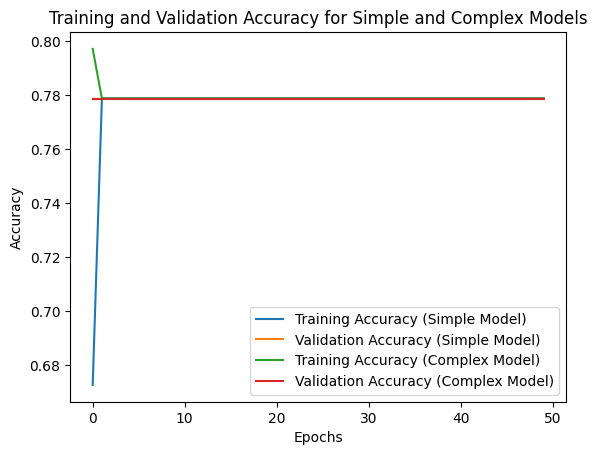

In [ ]:
#simple model
plt.plot(history_simple.history['accuracy'], label='Training Accuracy (Simple Model)')
plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy (Simple Model)')

#complex model
plt.plot(history_complex.history['accuracy'], label='Training Accuracy (Complex Model)')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy (Complex Model)')

plt.title('Training and Validation Accuracy for Simple and Complex Models')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Can you achieve more accuracy with complex model? How much more? Any other findings?


Yes the complex model achieves slightly more accuracy than the simple model. both training and validation accuracy for the complex model are higher(around 0.78)

The validation accuracy of the complex model is approximately 0.78, while the simple model achieves slightly less (around 0.72). the complex model achieves about 6% higher validation accuracy than the simple model.

The simple model shows a rapid increase in training accuracy followed by some fluctuation in validation accuracy, which might indicate underfitting or a lack of capacity to generalizee.



